In [1]:
import os
import numpy as np
import scipy.linalg as slin
import scipy.optimize as sopt
from scipy.special import expit as sigmoid
import matplotlib.pyplot as plt

### Running notears
Very simple! Clone the repo, interestingly enough, copy "linear.py" up one directory, and run the command below

In [6]:

# fill this in. This should point to the root of the github repo, i.e., 
# where the directories "bin", "experiments", "notears", etc. are
path = "C:/Users/s165048/OneDrive - TU Eindhoven/QuinceyFinalProject/final-project/src/Week 12/notears/notears"
sys.append(path)

AttributeError: module 'sys' has no attribute 'append'

### Run the main example
For some reason, imports do not work from the original directory, so I had to copy ``linear.py`` and put it also one directory up. Not ideal to have two copies, but I never intend to run it again using ``!python ...`` anyways.

In [3]:
# set working directory to the correct place
os.chdir(path)

# run main of linear.py. Does not allow for changing of settings
!python ../linear.py

VAR based on a graph on 5 nodes and 5 edges, 50 samples.
Original Adjacency Matrix:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]].

Original WAM:
[[ 0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.5 -1.9]
 [-1.9  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1.1]
 [ 0.   0.  -0.9  0.   0. ]].

2.383189645627226e-09 10000000000.0
Estimated WAM:
[[ 0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -1.5]
 [-1.9  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1. ]
 [ 0.   0.  -1.   0.   0. ]].

{'fdr': 0.0, 'tpr': 0.8, 'fpr': 0.0, 'shd': 1, 'nnz': 4}


### Step by Step
#### Basic Settings
We import the modules, set the seed for reproducibility. We then define our parameters.

In [4]:
from notears.notears import utils
from notears.notears import linear

utils.set_random_seed(1)

n, d, s0, graph_type, sem_type = 50, 5, 5, 'ER', 'gauss'
print(f"VAR based on a DAG on {d} nodes and {s0} edges, {n} samples.\n")

VAR based on a DAG on 5 nodes and 5 edges, 50 samples.



#### Simulate W
We simulate a directed acyclic graph with $d$ variables and $s0$ edges. The graph type is generally an Erdos Renyi (ER) graph.

In [5]:
B_true = utils.simulate_dag(d, s0, graph_type)
print(f"Original Adjacency Matrix:\n{B_true}.\n")

Original Adjacency Matrix:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]].



#### From AM to WAM
We transform the binary adjacency matrix $B$ to a weighted adjacency matrix $W$. We do this by assigning weights to each edge. The edges are picked uniformly from the range $w\_ranges$.

In [6]:
W_true = utils.simulate_parameter(B_true, w_ranges = ((-2.0, -0.5), (0.5, 2.0)))
print(f"Original WAM:\n{np.round(W_true, 1)}.\n")

Original WAM:
[[ 0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.5 -1.9]
 [-1.9  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1.1]
 [ 0.   0.  -0.9  0.   0. ]].



#### Simulate VAR data according to $W\_true$
We sample $n$ samples of this VAR(1) model, with a multivariate standard normal as noise. 

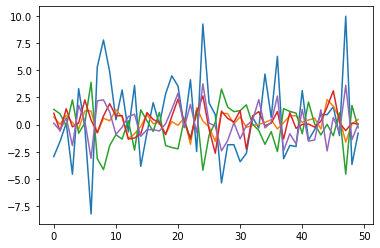

In [7]:
X = utils.simulate_linear_sem(W_true, n, 'gauss')
plt.plot(X);

#### NOTEARS Estimation
Now we will estimate using NOTEARS, the $\ell_1$-penalty parameter is $\texttt{lambda1}$. As we have a VAR(1) model, we will use the loss type $\texttt{l2-var}$.

In [8]:
W_est = linear.notears_linear(X, lambda1=0.1, loss_type='l2', h_tol = 1e-18, rho_max = 1e20)
print(f"Estimated WAM:\n{np.round(W_est, 1)}.\n")

Terminating: value for h: 1.3322676295501878e-13, rho: 1e+20.
Gradient:
[[ 1.68e-07 -1.82e-07 -3.27e-07  2.42e-07  3.88e-07]
 [ 0.00e+00  9.65e-08  0.00e+00  9.48e-15 -9.15e-15]
 [-8.31e-14  7.52e-08  1.70e-07 -1.23e-07 -1.90e-07]
 [ 0.00e+00  8.93e-08  0.00e+00  1.25e-07  1.12e-13]
 [ 1.41e-14 -9.75e-08 -1.92e-13  1.16e-07  1.70e-07]].

Augm. Lagr. function value: 2.727960071317141
Gradient:
[ 4.21e+00 -4.38e+00 -8.03e+00  6.20e+00  9.85e+00  1.86e-01  2.41e+00
  1.51e-01  1.60e-03  2.03e-01  2.01e-01  1.88e+00  4.28e+00 -2.98e+00
 -4.60e+00  1.56e-01  2.24e+00  1.27e-01  3.14e+00 -2.90e-03  6.95e-04
 -2.27e+00  2.05e-01  2.91e+00  4.28e+00 -4.01e+00  4.58e+00  8.23e+00
 -6.00e+00 -9.65e+00  1.43e-02 -2.21e+00  4.90e-02  1.98e-01 -2.64e-03
 -1.16e-03 -1.68e+00 -4.08e+00  3.18e+00  4.80e+00  4.38e-02 -2.04e+00
  7.30e-02 -2.94e+00  2.03e-01  1.99e-01  2.47e+00 -4.97e-03 -2.71e+00
 -4.08e+00].
Estimated WAM:
[[ 0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.8 -1.6]
 [-1.8  0.   0.   0.   

#### Get results


In [9]:
acc = utils.count_accuracy(B_true, W_est != 0)
print(acc)

{'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'nnz': 5}


### Version 2: Allow for self-loops

Large value for $\rho_{max}$.

VAR based on a DAG on 5 nodes and 10 edges, 50 samples.

Original Adjacency Matrix:
[[0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0.]
 [1. 0. 1. 0. 1.]].

Original WAM:
[[ 0.   0.   0.   0.   0. ]
 [ 0.  -0.5 -0.5  0.  -0.5]
 [-0.5  0.   0.   0.   0. ]
 [ 0.5  0.  -0.5 -0.5  0. ]
 [-0.5  0.  -0.5  0.   0.5]].

Terminating: value for h: 0.00019505772445072012, rho: 1e+50.
Gradient:
[[ 4.28e-01 -9.52e-04 -3.00e-02 -2.43e-02  4.12e-03]
 [-8.13e-06 -6.75e-01 -2.93e-05 -7.56e-06 -8.53e-07]
 [-2.66e-03  2.02e-02  5.81e-02  2.70e-02 -3.10e-03]
 [ 7.99e-05  2.47e-05 -2.01e-05 -1.21e+00  5.78e-08]
 [-3.83e-04  1.57e-04 -2.18e-05  1.37e-06  1.21e+00]].

Augm. Lagr. function value: 5.707127380183958e+42
Gradient:
[ 1.67e+46 -3.71e+43 -1.17e+45 -9.49e+44  1.61e+44 -3.17e+41 -2.63e+46
 -1.14e+42 -2.95e+41 -3.33e+40 -1.04e+44  7.89e+44  2.27e+45  1.05e+45
 -1.21e+44  3.12e+42  9.63e+41 -7.83e+41 -4.71e+46  2.26e+39 -1.49e+43
  6.14e+42 -8.49e+41  5.35e+40  4.70e+46 -1.67e+46  3

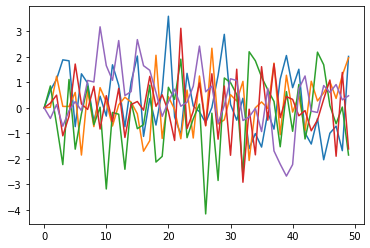

In [10]:
utils.set_random_seed(1)

n, d, s0, graph_type, sem_type = 50, 5, 10, 'VAR', 'gauss'
print(f"VAR based on a DAG on {d} nodes and {s0} edges, {n} samples.\n")

B_true = utils.simulate_dag(d, s0, graph_type)
print(f"Original Adjacency Matrix:\n{B_true}.\n")

W_true = utils.simulate_parameter(B_true, w_ranges = ((-0.5, -0.5), (0.5, 0.5)))
print(f"Original WAM:\n{np.round(W_true, 2)}.\n")

X = utils.simulate_var(W_true, n)
plt.plot(X);

W_est = linear.notears_linear(X, lambda1=0.0, loss_type='l2-var', h_tol = 1e-18, rho_max = 1e50)
print(f"Estimated WAM:\n{np.round(W_est, 2)}.\n")

acc = utils.count_accuracy(B_true, W_est != 0)
print(acc)

Even when the coefficients are larger than 1 in absolute value, notears seem to estimate them just fine. Even more, we seem to require much less samples $n$.

VAR based on a DAG on 3 nodes and 4 edges, 20 samples.

Original Adjacency Matrix:
[[0. 0. 1.]
 [0. 1. 1.]
 [0. 0. 1.]].

Original WAM:
[[ 0.  0. -2.]
 [ 0. -2. -2.]
 [ 0.  0. -2.]].

Terminating: value for h: 0.0, rho: 1.0.
Gradient:
[[-4.95e-01 -3.01e-16 -7.51e-18]
 [ 3.58e-07 -4.00e+00 -9.01e-18]
 [-2.61e-03 -1.24e-03 -4.00e+00]].

Augm. Lagr. function value: 1.410503651036337
Gradient:
[ 1.20e-05 -5.29e-05  6.95e-07 -3.88e-02  1.03e-01 -1.45e-01 -5.14e-02
  3.24e-01 -5.03e-01 -1.20e-05  5.29e-05 -6.95e-07  3.88e-02 -1.03e-01
  1.45e-01  5.14e-02 -3.24e-01  5.03e-01].
Estimated WAM:
[[ 0.    0.   -2.47]
 [ 0.   -2.   -2.  ]
 [ 0.    0.   -2.  ]].

{'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'nnz': 4}


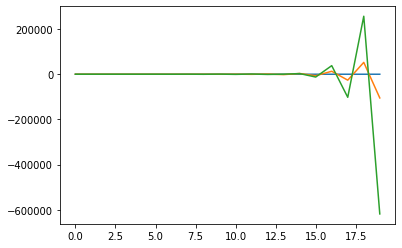

In [11]:
utils.set_random_seed(2)

n, d, s0, graph_type, sem_type = 20, 3, 4, 'VAR', 'gauss'
print(f"VAR based on a DAG on {d} nodes and {s0} edges, {n} samples.\n")

B_true = utils.simulate_dag(d, s0, graph_type)
print(f"Original Adjacency Matrix:\n{B_true}.\n")

W_true = utils.simulate_parameter(B_true, w_ranges = ((-2.0, -2.0), (-2.0, -2.0)))
print(f"Original WAM:\n{np.round(W_true, 2)}.\n")

X = utils.simulate_var(W_true, n)
plt.plot(X);

W_est = linear.notears_linear(X, lambda1=0.0, loss_type='l2-var', h_tol = 1e-18, rho_max = 1e12)
print(f"Estimated WAM:\n{np.round(W_est, 2)}.\n")

acc = utils.count_accuracy(B_true, W_est != 0)
print(acc)

VAR based on a DAG on 4 nodes and 10 edges, 20 samples.

Original Adjacency Matrix:
[[1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 1. 1.]].

Original WAM:
[[ 0.61  0.    0.    0.  ]
 [ 0.77 -0.68  0.58  0.  ]
 [-0.81  0.    0.67  0.  ]
 [-0.71 -0.85  0.62 -0.83]].

Terminating: value for h: 7.75094919376329e-05, rho: 1e+33.
Gradient:
[[ 5.16e-01  7.85e-04 -1.65e-01  7.71e-03]
 [ 1.86e-06 -7.71e-01  2.01e-04 -7.82e-03]
 [-1.51e-04  7.34e-03  6.20e-01  1.52e-02]
 [-1.09e-06 -1.63e-06  3.28e-05 -1.06e+00]].

Augm. Lagr. function value: 9.011582010644969e+24
Gradient:
[ 8.00e+28  1.22e+26 -2.55e+28  1.19e+27  2.89e+23 -1.20e+29  3.11e+25
 -1.21e+27 -2.34e+25  1.14e+27  9.61e+28  2.36e+27 -1.68e+23 -2.53e+23
  5.09e+24 -1.64e+29 -8.00e+28 -1.22e+26  2.55e+28 -1.19e+27 -2.89e+23
  1.20e+29 -3.11e+25  1.21e+27  2.34e+25 -1.14e+27 -9.61e+28 -2.36e+27
  1.68e+23  2.53e+23 -5.09e+24  1.64e+29].
Estimated WAM:
[[ 0.    0.    0.    0.  ]
 [ 0.41 -0.39  0.42  0.  ]
 [-0.97  0.    0.31  0.  ]


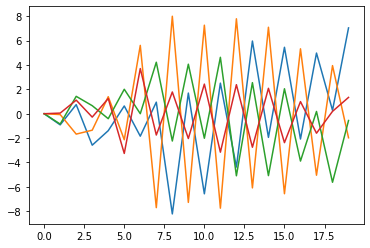

In [12]:
utils.set_random_seed(1)

n, d, s0, graph_type, sem_type = 20, 4, 10, 'VAR', 'gauss'
print(f"VAR based on a DAG on {d} nodes and {s0} edges, {n} samples.\n")

B_true = utils.simulate_dag(d, s0, graph_type)
print(f"Original Adjacency Matrix:\n{B_true}.\n")

W_true = utils.simulate_parameter(B_true, w_ranges = ((-0.5, -0.9), (0.5, 0.9)))
print(f"Original WAM:\n{np.round(W_true, 2)}.\n")

X = utils.simulate_var(W_true, n)
plt.plot(X);

W_est = linear.notears_linear(X, lambda1=0.0, loss_type='l2-var', h_tol = 1e-18, rho_max = 1e32)
print(f"Estimated WAM:\n{np.round(W_est, 2)}.\n")

acc = utils.count_accuracy(B_true, W_est != 0)
print(acc)

## Things go wrong
Sometimes, the value $\rho_{max}$ will become too large, and the algorithm will terminate whereas $W$ is not a DAG. We can see that variable $1$ depends on variable $2$ and vice versa, meaning that we most certainly do not have a DAG here.

VAR based on a DAG on 10 nodes and 3 edges, 50 samples.

Original Adjacency Matrix:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]].

Original WAM:
[[0.  0.  0.  0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]].

Estimated WAM:
[[-0.31 -0.3   0.    0.    0.    0.58  0.    0.    0.    0.  ]
 [ 0.35  0.    0.    0.38  0.    0.    0.    0.    0.    0

ValueError: B_est should be a DAG

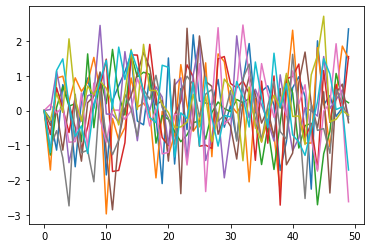

In [7]:
utils.set_random_seed(1)

n, d, s0, graph_type, sem_type = 50, 10, 3, 'VAR', 'gauss'
print(f"VAR based on a DAG on {d} nodes and {s0} edges, {n} samples.\n")

B_true = utils.simulate_dag(d, s0, graph_type)
print(f"Original Adjacency Matrix:\n{B_true}.\n")

W_true = utils.simulate_parameter(B_true, w_ranges = ((-0.5, -0.5), (0.5, 0.5)))
print(f"Original WAM:\n{np.round(W_true, 2)}.\n")

X = utils.simulate_var(W_true, n)
plt.plot(X);

W_est = linear.notears_linear(X, lambda1=0.0, loss_type='l2-var', h_tol = 1e-18, rho_max = 1e15)
print(f"Estimated WAM:\n{np.round(W_est, 2)}.\n")

acc = utils.count_accuracy(B_true, W_est != 0)
print(acc)

does not occur when we double the number of samples to $100$.

In [ ]:
utils.set_random_seed(1)

n, d, s0, graph_type, sem_type = 100, 10, 3, 'VAR', 'gauss'
print(f"VAR based on a DAG on {d} nodes and {s0} edges, {n} samples.\n")

B_true = utils.simulate_dag(d, s0, graph_type)
print(f"Original Adjacency Matrix:\n{B_true}.\n")

W_true = utils.simulate_parameter(B_true, w_ranges = ((-0.5, -0.5), (0.5, 0.5)))
print(f"Original WAM:\n{np.round(W_true, 2)}.\n")

X = utils.simulate_var(W_true, n)
plt.plot(X);

W_est = linear.notears_linear(X, lambda1=0.0, loss_type='l2-var', h_tol = 1e-18, rho_max = 1e50)
print(f"Estimated WAM:\n{np.round(W_est, 2)}.\n")

acc = utils.count_accuracy(B_true, W_est != 0)
print(acc)

VAR based on a DAG on 8 nodes and 36 edges, 100 samples.

Original Adjacency Matrix:
[[1. 1. 1. 1. 1. 0. 1. 1.]
 [0. 1. 1. 1. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 0. 1. 1.]
 [0. 0. 1. 1. 1. 0. 0. 1.]].

Original WAM:
[[ 0.9   1.75 -1.06 -2.08 -0.71  0.   -2.32 -1.09]
 [ 0.   -0.76 -0.54 -1.86  2.01  0.    0.   -0.61]
 [ 0.    0.    0.56  0.    0.    0.    0.    0.  ]
 [ 0.    0.    1.67  0.9   0.    0.    0.    0.  ]
 [ 0.    0.   -1.3   1.99  0.9   0.    0.    0.  ]
 [ 0.59 -1.75  0.95 -1.2  -1.04  0.53  0.64 -2.43]
 [ 0.    0.91  1.    1.99 -1.4   0.    0.9   2.19]
 [ 0.    0.   -0.51 -1.73  0.81  0.    0.    0.9 ]].

Estimated WAM:
[[ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.55  0.    0.    0.    0.    0.  ]
 [ 0.    0.    1.69  0.95  0.    0.    0.    0.  ]
 [ 0.    0.   -1.4   1.72  0.99  0.    0.    0.  ]
 

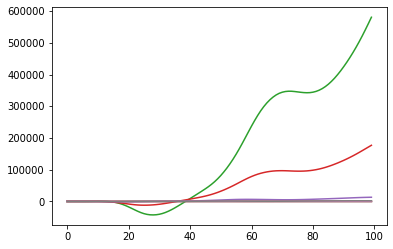

In [9]:
utils.set_random_seed(1)

n, d, s0, graph_type, sem_type = 100, 8, 36, 'VAR', 'gauss'
print(f"VAR based on a DAG on {d} nodes and {s0} edges, {n} samples.\n")

B_true = utils.simulate_dag(d, s0, graph_type)
print(f"Original Adjacency Matrix:\n{B_true}.\n")

W_true = utils.simulate_parameter(B_true, w_ranges = ((-0.5, -2.5), (0.5, 2.5)))

for i, elem in enumerate(np.diag(W_true)):
    if np.abs(elem) > 1:
        W_true[i][i] = np.random.uniform(low = 0.9, high = 0.9)
        
print(f"Original WAM:\n{np.round(W_true, 2)}.\n")
        
X = utils.simulate_var(W_true, n)
plt.plot(X);

W_est = linear.notears_linear(X, lambda1=0.0, loss_type='l2-var', h_tol = 1e-18, rho_max = 1e50)
print(f"Estimated WAM:\n{np.round(W_est, 2)}.\n")

acc = utils.count_accuracy(B_true, W_est != 0)
print(acc)

VAR based on a DAG on 5 nodes and 3 edges, 5 samples.

Original Adjacency Matrix:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1.]].

Original WAM:
[[ 0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0. ]
 [ 0.   0.   0.5  0.   0. ]
 [ 0.   0.   0.   0.   0. ]
 [-0.5  0.   0.   0.   0.5]].

Estimated WAM:
[[ 0.    0.73 -0.59  0.    0.  ]
 [ 0.    0.    0.   -0.48  0.  ]
 [ 0.    0.62  0.    0.48  0.  ]
 [ 0.    0.    0.    0.    0.  ]
 [-0.59 -0.42  0.    0.    0.  ]].

{'fdr': 0.8571428571428571, 'tpr': 0.3333333333333333, 'fpr': 0.8571428571428571, 'shd': 8, 'nnz': 7}


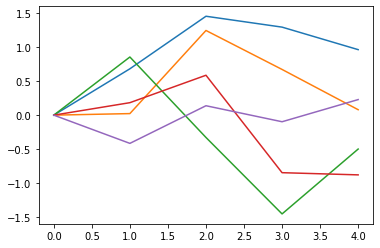

In [8]:
utils.set_random_seed(1)

n, d, s0, graph_type, sem_type = 5, 5, 3, 'VAR', 'gauss'
print(f"VAR based on a DAG on {d} nodes and {s0} edges, {n} samples.\n")

B_true = utils.simulate_dag(d, s0, graph_type)
print(f"Original Adjacency Matrix:\n{B_true}.\n")

W_true = utils.simulate_parameter(B_true, w_ranges = ((-0.5, -0.5), (0.5, 0.5)))
print(f"Original WAM:\n{np.round(W_true, 2)}.\n")

X = utils.simulate_var(W_true, n)
plt.plot(X);

W_est = linear.notears_linear(X, lambda1=0.0, loss_type='l2-var', h_tol = 1e-18, rho_max = 1e50)
print(f"Estimated WAM:\n{np.round(W_est, 2)}.\n")

acc = utils.count_accuracy(B_true, W_est != 0)
print(acc)